# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('train.csv')
dataset=dataset.dropna()

In [5]:
dataset.shape

(27447, 2)

In [4]:
dataset['sentiment'].replace(('negative','neutral','positive'), (2,0,1), inplace=True)

In [60]:
counts=dataset['sentiment'].value_counts()
counts

0    11105
1     8575
2     7767
Name: sentiment, dtype: int64

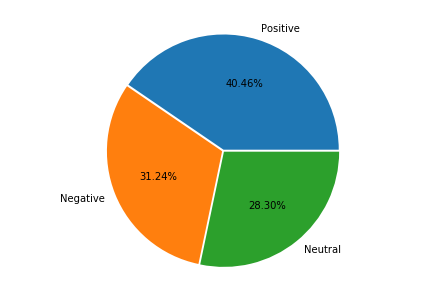

In [64]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
lab = ['Positive','Negative','Neutral']
ax.pie(counts,labels=lab,autopct='%1.2f%%',explode=(0.01,0.01,0.01))
plt.show()

# Cleaning the texts

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
corpus = []
for i in range(0,27447):
    review = re.sub("[^a-zA-Z]", " ", str(dataset.text))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Creating the Bag of Words model

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100)
cv.fit(corpus)
X = cv.transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer()
tfidf_trans=tfidf_transformer.fit_transform(X)
tfidf_trans=tfidf_trans.toarray()

In [27]:
#For train set
count_vect = CountVectorizer(max_features=9693)
X_train_counts = count_vect.fit_transform(X_train)
tfidf_trans= TfidfTransformer()
X_train_tfidf = tfidf_trans.fit_transform(X_train_counts).toarray()

#for test set
X_test_counts = count_vect.fit_transform(X_test)
tfidf_trans = TfidfTransformer()
X_test_tfidf = tfidf_trans.fit_transform(X_test_counts).toarray()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['sentiment'],test_size=0.20 ,random_state = 123)

In [34]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [35]:
y_pred = clf.predict(X_test_tfidf)

In [36]:
X_test_tfidf.shape

(5490, 9693)

In [37]:
y_train.shape,y_test.shape,X_test_tfidf.shape,X_train_tfidf.shape

((21957,), (5490,), (5490, 9693), (21957, 9693))

In [38]:
X_train_tfidf.shape,X_test_tfidf.shape,y_test.shape,y_pred.shape

((21957, 9693), (5490, 9693), (5490,), (5490,))

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1021,  560,  605],
       [ 719,  509,  476],
       [ 706,  392,  502]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.37012750455373405

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.47      0.44      2186
           1       0.35      0.30      0.32      1704
           2       0.32      0.31      0.32      1600

    accuracy                           0.37      5490
   macro avg       0.36      0.36      0.36      5490
weighted avg       0.37      0.37      0.37      5490



# The Accuracy is very poor so I have used a different approach in the text mining part in the next model